In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("price_train.csv")
df_to_predict = pd.read_csv("price_test.csv")

# EDA

In [4]:
df.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,...,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,...,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,...,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,...,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,...,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


In [5]:
df_to_predict.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,...,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,130,392779,False,90%,within an hour,1,True,4,Beacon Hill,Guest suite,...,1.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$85.00,3,300,True,moderate
1,2425,12456183,True,86%,within a day,1,False,4,Lake City,Guest suite,...,1.0,1,2,Real Bed,"{TV,Wifi,""Free parking on premises"",""Pets allo...",$40.00,2,1125,True,moderate
2,432,1851863,True,100%,within an hour,1,True,2,Northgate,Apartment,...,1.0,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",$150.00,5,120,False,strict_14_with_grace_period
3,5994,23309878,True,100%,within an hour,2,True,2,Downtown,Apartment,...,1.0,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$75.00,1,30,False,strict_14_with_grace_period
4,2110,10768347,False,100%,within an hour,1,False,2,Other neighborhoods,House,...,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,1,3,False,flexible


In [6]:
df.shape

(3466, 25)

In [7]:
df_to_predict.shape

(1734, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            3466 non-null   int64  
 1   id                            3466 non-null   int64  
 2   host_is_superhost             3466 non-null   bool   
 3   host_response_rate            3466 non-null   object 
 4   host_response_time            3466 non-null   object 
 5   host_listings_count           3466 non-null   int64  
 6   host_identity_verified        3466 non-null   bool   
 7   accommodates                  3466 non-null   int64  
 8   neighbourhood_group_cleansed  3466 non-null   object 
 9   property_type                 3466 non-null   object 
 10  room_type                     3466 non-null   object 
 11  latitude                      3466 non-null   float64
 12  longitude                     3466 non-null   float64
 13  gue

In [9]:
df_to_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            1734 non-null   int64  
 1   id                            1734 non-null   int64  
 2   host_is_superhost             1734 non-null   bool   
 3   host_response_rate            1734 non-null   object 
 4   host_response_time            1734 non-null   object 
 5   host_listings_count           1734 non-null   int64  
 6   host_identity_verified        1734 non-null   bool   
 7   accommodates                  1734 non-null   int64  
 8   neighbourhood_group_cleansed  1734 non-null   object 
 9   property_type                 1734 non-null   object 
 10  room_type                     1734 non-null   object 
 11  latitude                      1734 non-null   float64
 12  longitude                     1734 non-null   float64
 13  gue

In [10]:
df.describe()

,X1,id,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,minimum_nights,maximum_nights
count,3466.000000,3.466000e+03,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.00000,3466.000000,3466.000000
mean,4501.088575,1.843582e+07,67.848817,3.761108,47.625409,-122.334011,2.114541,1.317802,1.378823,1.98240,3.328621,595.884305
std,2483.133761,8.885055e+06,211.743448,2.446790,0.045099,0.031438,1.836108,0.672634,1.051297,1.55458,10.540059,530.773958
min,1.000000,4.291000e+03,0.000000,1.000000,47.496037,-122.419637,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,2328.500000,1.197427e+07,1.000000,2.000000,47.605720,-122.353609,1.000000,1.000000,1.000000,1.00000,1.000000,30.000000
50%,4681.500000,2.024816e+07,2.000000,3.000000,47.620930,-122.332553,1.000000,1.000000,1.000000,1.00000,2.000000,365.000000
75%,6696.750000,2.546066e+07,10.750000,5.000000,47.658976,-122.312695,2.000000,1.000000,2.000000,2.00000,2.000000,1125.000000
max,8456.000000,3.223951e+07,1596.000000,28.000000,47.733955,-122.232314,16.000000,8.000000,8.000000,20.00000,330.000000,1825.000000


In [11]:
df.isnull().sum()
# no null values present in data

X1                              0
id                              0
host_is_superhost               0
host_response_rate              0
host_response_time              0
host_listings_count             0
host_identity_verified          0
accommodates                    0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
latitude                        0
longitude                       0
guests_included                 0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
cleaning_fee                    0
minimum_nights                  0
maximum_nights                  0
instant_bookable                0
cancellation_policy             0
price                           0
dtype: int64

In [12]:
df_to_predict.isnull().sum() #No null values in to_predict dataset

X1                              0
id                              0
host_is_superhost               0
host_response_rate              0
host_response_time              0
host_listings_count             0
host_identity_verified          0
accommodates                    0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
latitude                        0
longitude                       0
guests_included                 0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
cleaning_fee                    0
minimum_nights                  0
maximum_nights                  0
instant_bookable                0
cancellation_policy             0
dtype: int64

In [13]:
df.nunique()

X1                              3466
id                              3466
host_is_superhost                  2
host_response_rate                32
host_response_time                 4
host_listings_count               61
host_identity_verified             2
accommodates                      19
neighbourhood_group_cleansed      17
property_type                     26
room_type                          3
latitude                        3465
longitude                       3459
guests_included                   16
bathrooms                         12
bedrooms                           9
beds                              18
bed_type                           4
amenities                       3069
cleaning_fee                     154
minimum_nights                    28
maximum_nights                    92
instant_bookable                   2
cancellation_policy                6
price                            306
dtype: int64

In [14]:
# Convert price, cleaning fee and host response rate into float values as these are numerical columns 

df["price"] = df["price"].apply(lambda x: float(x.replace("$","").replace(",", "")))
df["cleaning_fee"] = df["cleaning_fee"].apply(lambda x : float(x.replace("$","")))
df["host_response_rate"] = df["host_response_rate"].apply(lambda x : float(x.replace("%","")))


df_to_predict["cleaning_fee"] = df_to_predict["cleaning_fee"].apply(lambda x : float(x.replace("$","")))
df_to_predict["host_response_rate"] = df_to_predict["host_response_rate"].apply(lambda x : float(x.replace("%","")))

In [15]:
df.describe()

,X1,id,host_response_rate,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,price
count,3466.000000,3.466000e+03,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.00000,3466.000000,3466.000000,3466.000000,3466.000000
mean,4501.088575,1.843582e+07,97.977207,67.848817,3.761108,47.625409,-122.334011,2.114541,1.317802,1.378823,1.98240,69.577611,3.328621,595.884305,159.038950
std,2483.133761,8.885055e+06,10.057830,211.743448,2.446790,0.045099,0.031438,1.836108,0.672634,1.051297,1.55458,58.357637,10.540059,530.773958,158.735786
min,1.000000,4.291000e+03,0.000000,0.000000,1.000000,47.496037,-122.419637,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000
25%,2328.500000,1.197427e+07,100.000000,1.000000,2.000000,47.605720,-122.353609,1.000000,1.000000,1.000000,1.00000,30.000000,1.000000,30.000000,79.000000
50%,4681.500000,2.024816e+07,100.000000,2.000000,3.000000,47.620930,-122.332553,1.000000,1.000000,1.000000,1.00000,60.000000,2.000000,365.000000,115.000000
75%,6696.750000,2.546066e+07,100.000000,10.750000,5.000000,47.658976,-122.312695,2.000000,1.000000,2.000000,2.00000,90.000000,2.000000,1125.000000,180.000000
max,8456.000000,3.223951e+07,100.000000,1596.000000,28.000000,47.733955,-122.232314,16.000000,8.000000,8.000000,20.00000,430.000000,330.000000,1825.000000,1650.000000


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

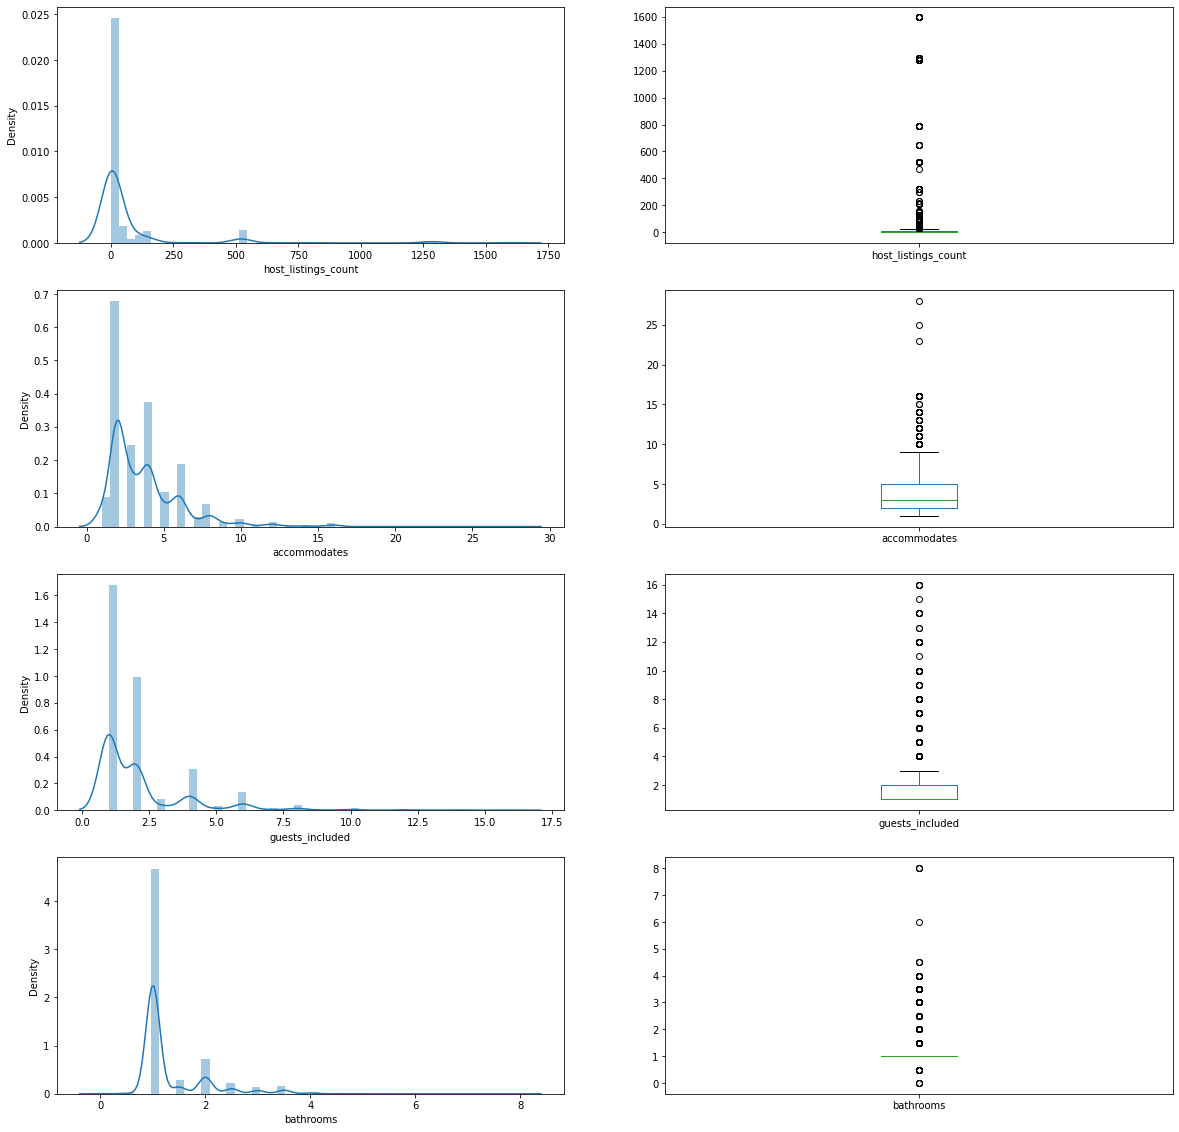

In [16]:
#Plot Numerical columns

# plt.figure(1)

plt.subplot(421)
sns.distplot(df['host_listings_count']);
plt.subplot(422)
df['host_listings_count'].plot.box(figsize=(20,20))

plt.subplot(423)
sns.distplot(df['accommodates']);
plt.subplot(424)
df['accommodates'].plot.box(figsize=(20,20))

plt.subplot(425)
sns.distplot(df['guests_included']);
plt.subplot(426)
df['guests_included'].plot.box(figsize=(20,20))

plt.subplot(427)
sns.distplot(df['bathrooms']);
plt.subplot(428)
df['bathrooms'].plot.box()

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

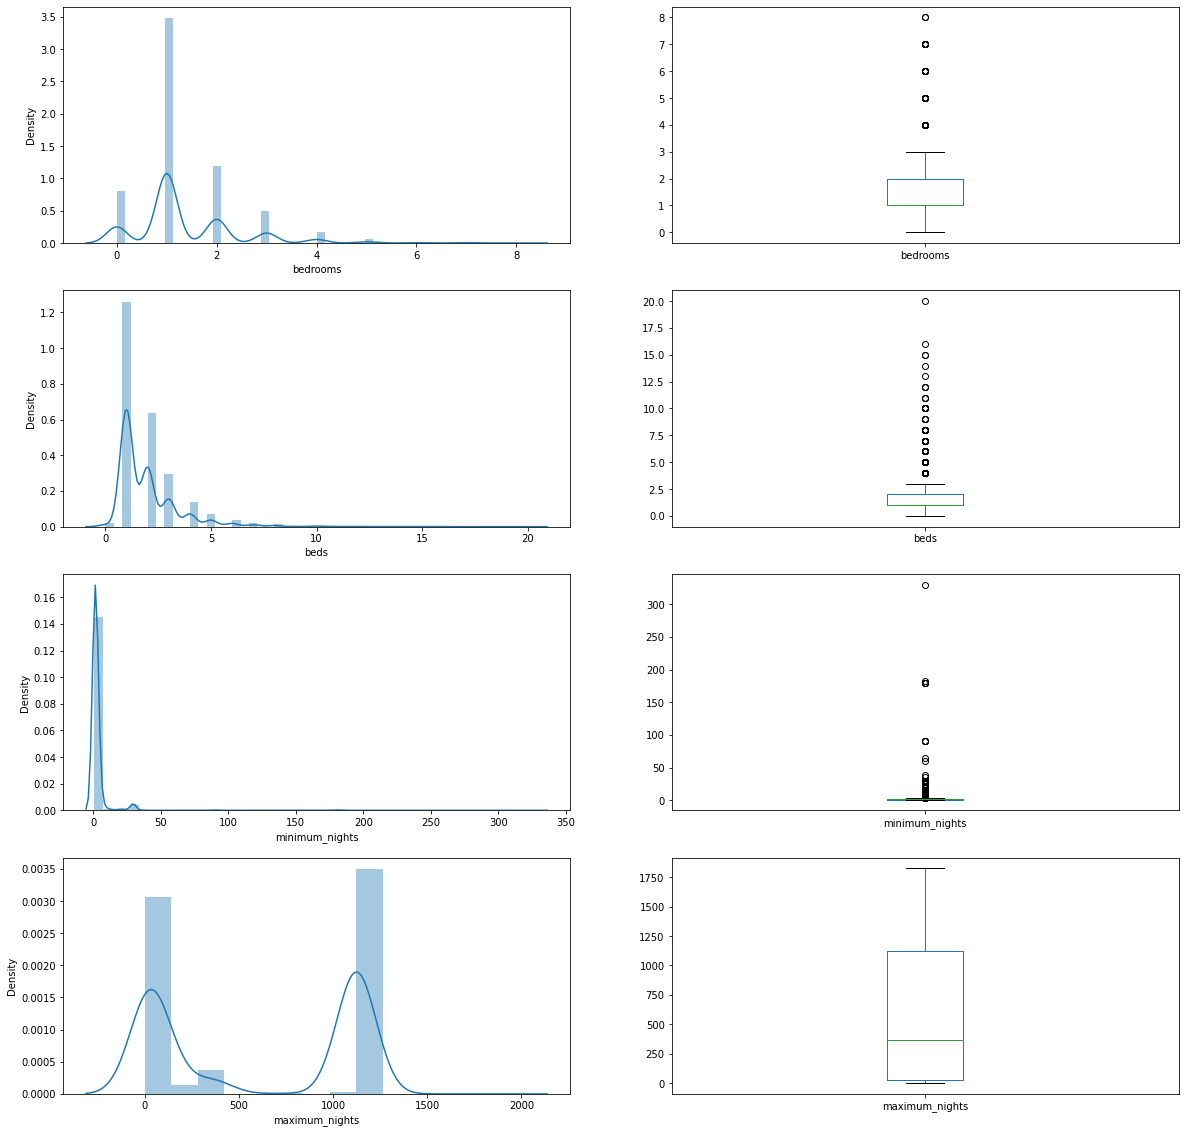

In [17]:
# plt.figure(2)

plt.subplot(421)
sns.distplot(df['bedrooms']);
plt.subplot(422)
df['bedrooms'].plot.box(figsize=(20,20))

plt.subplot(423)
sns.distplot(df['beds']);
plt.subplot(424)
df['beds'].plot.box()

plt.subplot(425)
sns.distplot(df['minimum_nights']);
plt.subplot(426)
df['minimum_nights'].plot.box()

plt.subplot(427)
sns.distplot(df['maximum_nights']);
plt.subplot(428)
df['maximum_nights'].plot.box(figsize=(20,20))

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

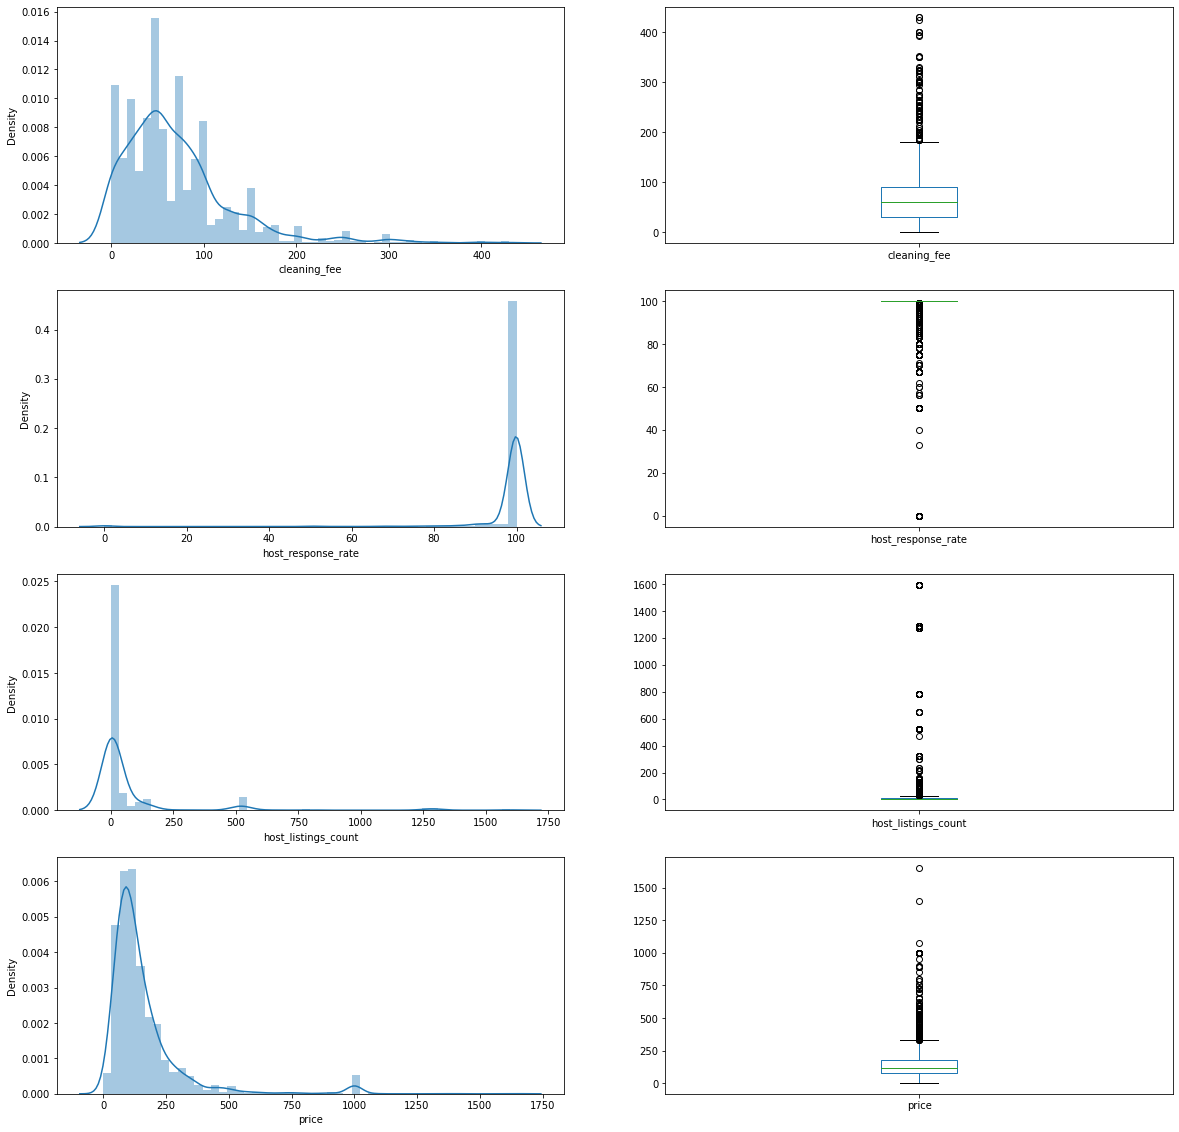

In [18]:
# plt.figure(3)

plt.subplot(421)
sns.distplot(df['cleaning_fee']);
plt.subplot(422)
df['cleaning_fee'].plot.box(figsize=(20,20))

plt.subplot(423)
sns.distplot(df['host_response_rate']);
plt.subplot(424)
df['host_response_rate'].plot.box()

plt.subplot(425)
sns.distplot(df['host_listings_count']);
plt.subplot(426)
df['host_listings_count'].plot.box()

plt.subplot(427)
sns.distplot(df['price']);
plt.subplot(428)
df['price'].plot.box()

plt.show()

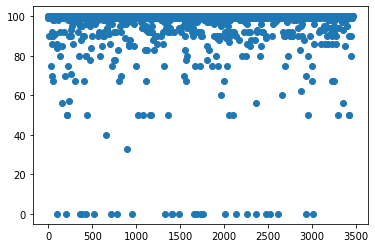

In [19]:
# From the below scatter plot we can see that majority of values in this column lie in the range of 85-100, 100 being the max value. As 97 is the mean as also lie in this range.

plt.scatter(range(len(df)),df['host_response_rate'])

In [20]:
# drop id and X1 before correlation heat map
df.drop(['id', 'X1'], axis = 1, inplace = True)
df_final_predicted = df_to_predict[["id"]]
df_to_predict.drop(['id', 'X1'], axis = 1, inplace = True)

In [21]:
df.shape

(3466, 23)

In [22]:
df_to_predict.shape

(1734, 22)

,host_is_superhost,host_response_rate,host_listings_count,host_identity_verified,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,price
host_is_superhost,1.000000,0.135312,-0.251724,0.178139,0.029976,0.031472,-0.028175,0.005917,-0.051945,0.021130,0.025615,-0.038012,-0.048737,-0.140728,-0.108978,-0.088158
host_response_rate,0.135312,1.000000,0.033796,-0.052880,0.027994,-0.022824,-0.008856,0.034350,-0.008165,0.000735,0.014279,0.016047,-0.038429,-0.026918,0.097616,0.014550
host_listings_count,-0.251724,0.033796,1.000000,-0.197717,0.012140,-0.075716,-0.030291,0.044703,0.011453,-0.032705,-0.037450,0.135420,0.006226,0.173826,0.165884,0.539016
host_identity_verified,0.178139,-0.052880,-0.197717,1.000000,-0.008747,0.049858,0.009511,-0.000534,0.048293,0.028514,0.017903,-0.076661,0.036959,-0.059467,-0.293922,-0.120693
accommodates,0.029976,0.027994,0.012140,-0.008747,1.000000,-0.024712,-0.054723,0.665960,0.548977,0.812256,0.865667,0.639728,-0.038819,0.036861,0.033269,0.499721
latitude,0.031472,-0.022824,-0.075716,0.049858,-0.024712,1.000000,-0.163524,-0.020540,0.007133,-0.011263,-0.005180,-0.013978,0.036532,-0.025317,-0.042532,-0.036569
longitude,-0.028175,-0.008856,-0.030291,0.009511,-0.054723,-0.163524,1.000000,-0.055097,-0.022418,-0.038281,-0.039856,-0.100058,-0.007538,0.008247,0.008736,-0.076728
guests_included,0.005917,0.034350,0.044703,-0.000534,0.665960,-0.020540,-0.055097,1.000000,0.408783,0.587819,0.581370,0.522198,-0.030652,0.018778,0.054904,0.396957
bathrooms,-0.051945,-0.008165,0.011453,0.048293,0.548977,0.007133,-0.022418,0.408783,1.000000,0.613708,0.536232,0.488651,-0.006655,0.013907,-0.058729,0.369484
bedrooms,0.021130,0.000735,-0.032705,0.028514,0.812256,-0.011263,-0.038281,0.587819,0.613708,1.000000,0.753692,0.620596,0.000170,0.017022,-0.036526,0.436939


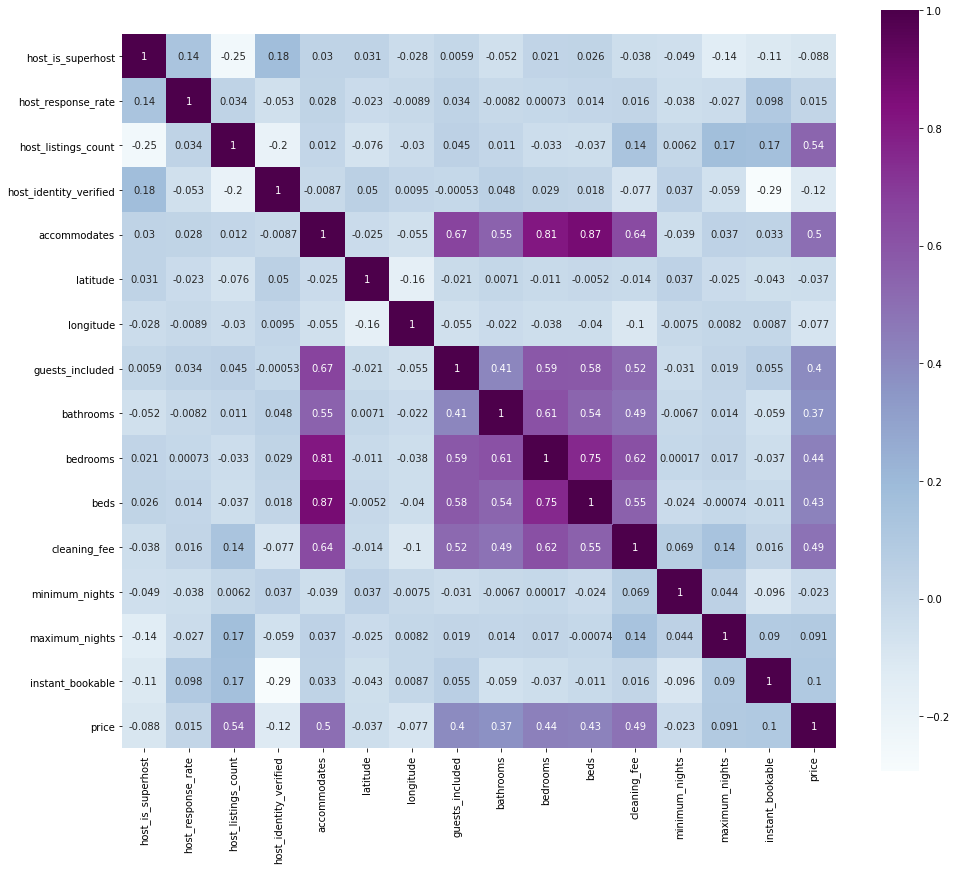

In [23]:
# calculate and visualize correlation matrix
matrix = df.corr()
f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

#### From the above heatmap we can observe that the most relevant features of the numerical columns for price prediction are:  host_listings_count	, accommodates, Cleaning_fee, beds, bedrooms, bathrooms and guests_included.

<AxesSubplot:title={'center':'property_type'}>

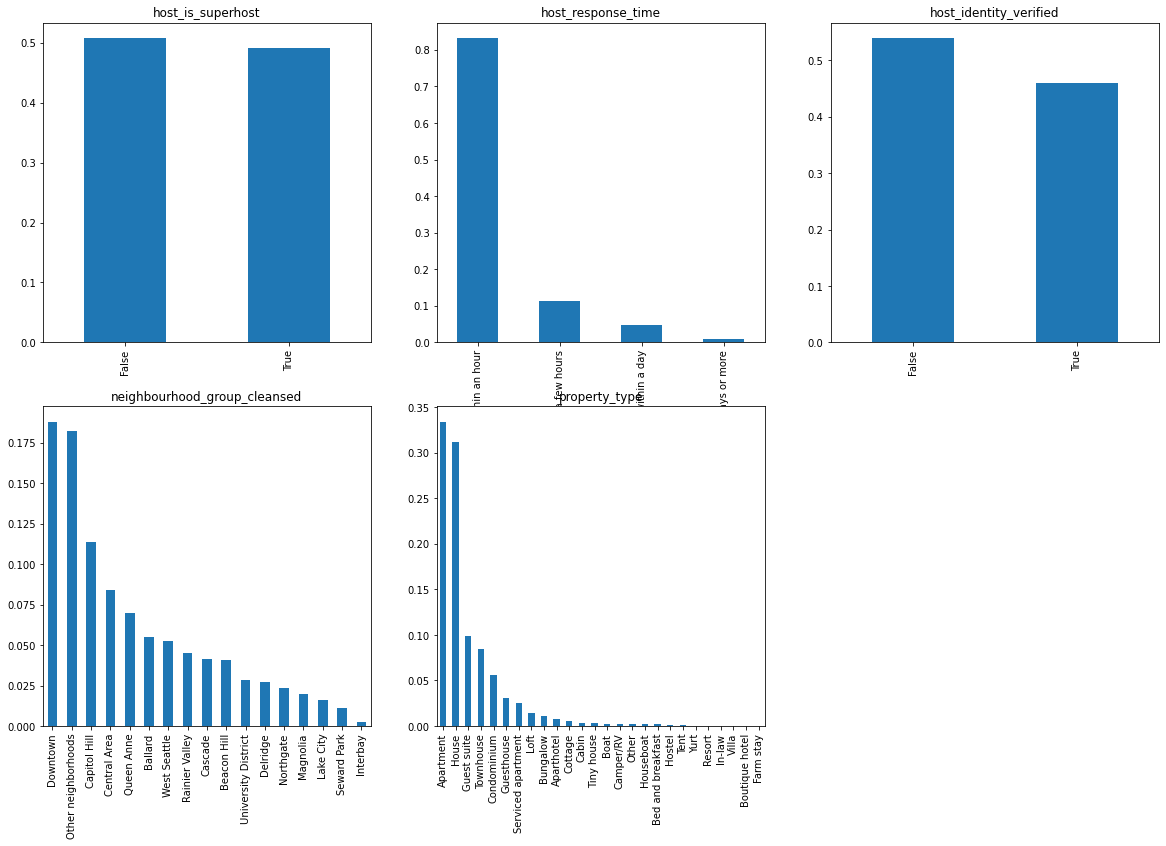

In [24]:
#Categorical columns plots

# plt.figure(1)

plt.subplot(331)
df['host_is_superhost'].value_counts(normalize=True).plot.bar(figsize=(20,20), title= 'host_is_superhost')

plt.subplot(332)
df['host_response_time'].value_counts(normalize=True).plot.bar(title= 'host_response_time')

plt.subplot(333)
df['host_identity_verified'].value_counts(normalize=True).plot.bar(title= 'host_identity_verified')

plt.subplot(334)
df['neighbourhood_group_cleansed'].value_counts(normalize=True).plot.bar(title= 'neighbourhood_group_cleansed')

plt.subplot(335)
df['property_type'].value_counts(normalize=True).plot.bar(title= 'property_type')


<AxesSubplot:title={'center':'cancellation_policy'}>

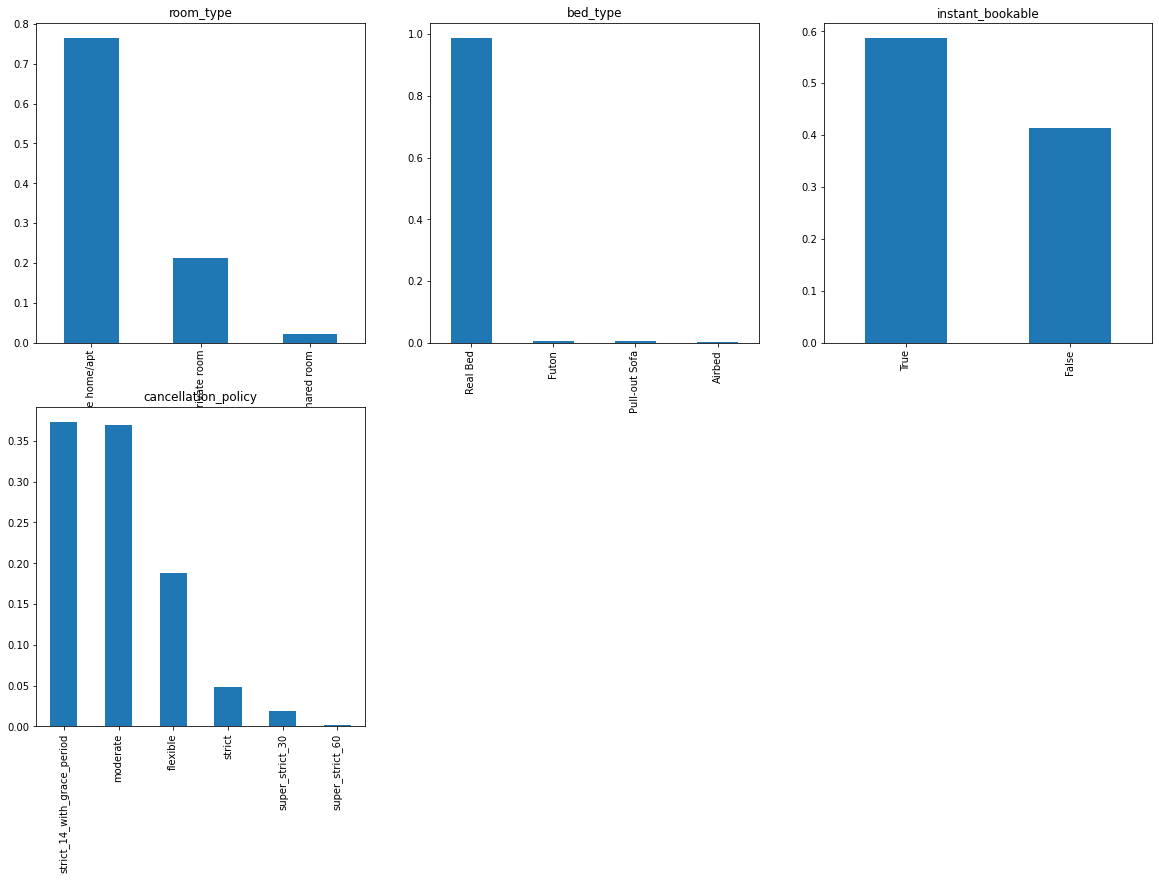

In [25]:
plt.subplot(331)
df['room_type'].value_counts(normalize=True).plot.bar(figsize=(20,20), title= 'room_type')

plt.subplot(332)
df['bed_type'].value_counts(normalize=True).plot.bar(title= 'bed_type')

plt.subplot(333)
df['instant_bookable'].value_counts(normalize=True).plot.bar(title= 'instant_bookable')

plt.subplot(334)
df['cancellation_policy'].value_counts(normalize=True).plot.bar(title= 'cancellation_policy')



## Outliers handling


In [26]:
df.describe()

,host_response_rate,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,price
count,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.00000,3466.000000,3466.000000,3466.000000,3466.000000
mean,97.977207,67.848817,3.761108,47.625409,-122.334011,2.114541,1.317802,1.378823,1.98240,69.577611,3.328621,595.884305,159.038950
std,10.057830,211.743448,2.446790,0.045099,0.031438,1.836108,0.672634,1.051297,1.55458,58.357637,10.540059,530.773958,158.735786
min,0.000000,0.000000,1.000000,47.496037,-122.419637,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000
25%,100.000000,1.000000,2.000000,47.605720,-122.353609,1.000000,1.000000,1.000000,1.00000,30.000000,1.000000,30.000000,79.000000
50%,100.000000,2.000000,3.000000,47.620930,-122.332553,1.000000,1.000000,1.000000,1.00000,60.000000,2.000000,365.000000,115.000000
75%,100.000000,10.750000,5.000000,47.658976,-122.312695,2.000000,1.000000,2.000000,2.00000,90.000000,2.000000,1125.000000,180.000000
max,100.000000,1596.000000,28.000000,47.733955,-122.232314,16.000000,8.000000,8.000000,20.00000,430.000000,330.000000,1825.000000,1650.000000


In [27]:
# Remove row with zero price 

In [28]:
df[(df['price'] ==0)].sort_values(by = 'price')

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,...,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
1481,False,100.0,within an hour,1,True,2,Capitol Hill,Apartment,Entire home/apt,47.615452,...,1,1,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,Dry...",100.0,3,1125,False,strict_14_with_grace_period,0.0


In [29]:
df.drop(df[df['price']==0].index, inplace = True)

In [30]:
df_to_predict.shape

(1734, 22)

# Data preparation (Data Engineering)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3465 entries, 0 to 3465
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_is_superhost             3465 non-null   bool   
 1   host_response_rate            3465 non-null   float64
 2   host_response_time            3465 non-null   object 
 3   host_listings_count           3465 non-null   int64  
 4   host_identity_verified        3465 non-null   bool   
 5   accommodates                  3465 non-null   int64  
 6   neighbourhood_group_cleansed  3465 non-null   object 
 7   property_type                 3465 non-null   object 
 8   room_type                     3465 non-null   object 
 9   latitude                      3465 non-null   float64
 10  longitude                     3465 non-null   float64
 11  guests_included               3465 non-null   int64  
 12  bathrooms                     3465 non-null   float64
 13  bed

In [32]:
df["amenities"] 

0       {TV,Internet,Wifi,Kitchen,Elevator,Heating,"Fa...
1       {TV,"Cable TV",Internet,Wifi,"Air conditioning...
2       {TV,Wifi,"Air conditioning",Kitchen,"Free stre...
3       {Internet,Wifi,Kitchen,"Pets live on this prop...
4       {TV,Wifi,Kitchen,"Free parking on premises","S...
                              ...                        
3461    {TV,Internet,Wifi,"Air conditioning",Kitchen,G...
3462    {Wifi,Kitchen,Heating,Essentials,Shampoo,Hange...
3463    {Wifi,Kitchen,"Free parking on premises","Pets...
3464    {TV,Wifi,"Free parking on premises","Indoor fi...
3465    {Wifi,Kitchen,"Free street parking",Heating,"S...
Name: amenities, Length: 3465, dtype: object

In [33]:
# get unique set of amenities to split into columns
amenities_set = set()
for amenitie in df['amenities']:
    amenitie_set = set(re.sub(r'(\"|\{|\})', '', amenitie).split(','))
    for piece in amenitie_set:
        if "translation missing" not in piece and piece:
            amenities_set.add(piece.strip())
            
amenities_set

{'24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Balcony',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Body soap',
 'Breakfast',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Central air conditioning',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'En suite bathroom',
 'Espresso machine',
 'Essentials',
 'Ethernet connection',
 'Exer

In [34]:
df['property_type'].value_counts()

Apartment             1157
House                 1079
Guest suite            343
Townhouse              292
Condominium            193
Guesthouse             105
Serviced apartment      89
Loft                    48
Bungalow                40
Aparthotel              26
Cottage                 18
Cabin                   12
Tiny house              12
Boat                     9
Camper/RV                9
Other                    7
Houseboat                7
Bed and breakfast        6
Hostel                   4
Tent                     3
Yurt                     1
Resort                   1
In-law                   1
Villa                    1
Boutique hotel           1
Farm stay                1
Name: property_type, dtype: int64

In [35]:
# get popular property types to split into columns
popular_property_types = list(df['property_type'].value_counts()[df['property_type']
                                                                 .value_counts() >= 7]
                              .index)
popular_property_types

['Apartment',
 'House',
 'Guest suite',
 'Townhouse',
 'Condominium',
 'Guesthouse',
 'Serviced apartment',
 'Loft',
 'Bungalow',
 'Aparthotel',
 'Cottage',
 'Cabin',
 'Tiny house',
 'Boat',
 'Camper/RV',
 'Other',
 'Houseboat']

In [36]:
def dum_col_filling(main_col_val, dum_col_name, main_col_name):
    if dum_col_name.replace(main_col_name + '_', '') in main_col_val:
        return 1
    else:
        return 0

def set_to_dummies(df, column_name):
    all_values_of_sets = amenities_set
    dummy_columns_name = [column_name + '_' + dum_col for dum_col in all_values_of_sets if dum_col]
    dummy_df = pd.DataFrame(0, index=df.index, columns=dummy_columns_name)
    df = pd.concat([dummy_df, df], axis = 1)
    for dum_col_name in dummy_columns_name:
        for i in df.index:
            df[dum_col_name][i] = dum_col_filling(df[column_name][i], dum_col_name, column_name)
    return df

def property_type_proc(val):
    if val in popular_property_types:
        return val
    else:
        return 'other'

def true_to_1(val):
    if val in {'True', True, 't'}:
        return 1
    else:
        return 0
    
def process_df(df):
    df = df.copy()
    df['property_type'] = df['property_type'].apply(property_type_proc)
    df = set_to_dummies(df, 'amenities')
    df.drop(['amenities'], axis = 1, inplace = True)
    
    #label encoding
    df['host_identity_verified'] = df['host_identity_verified'].apply(true_to_1)
    df['instant_bookable'] = df['instant_bookable'].apply(true_to_1)
    df['host_is_superhost'] = df['host_is_superhost'].apply(true_to_1)
    
    #one hot encoding
    df = pd.get_dummies(df, columns=['host_response_time','neighbourhood_group_cleansed','property_type',
                                     'bed_type','room_type','cancellation_policy'])
    return df.sort_index(ascending=False, axis=1)


df = process_df(df)
df_to_predict = process_df(df_to_predict)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
df.head()

,room_type_Shared room,room_type_Private room,room_type_Entire home/apt,property_type_other,property_type_Townhouse,property_type_Tiny house,property_type_Serviced apartment,property_type_Other,property_type_Loft,property_type_Houseboat,...,amenities_Babysitter recommendations,amenities_Baby monitor,amenities_Baby bath,amenities_BBQ grill,amenities_Amazon Echo,amenities_Air conditioning,amenities_Accessible-height toilet,amenities_Accessible-height bed,amenities_24-hour check-in,accommodates
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [38]:
df_to_predict.head()

,room_type_Shared room,room_type_Private room,room_type_Entire home/apt,property_type_other,property_type_Townhouse,property_type_Tiny house,property_type_Serviced apartment,property_type_Other,property_type_Loft,property_type_Houseboat,...,amenities_Babysitter recommendations,amenities_Baby monitor,amenities_Baby bath,amenities_BBQ grill,amenities_Amazon Echo,amenities_Air conditioning,amenities_Accessible-height toilet,amenities_Accessible-height bed,amenities_24-hour check-in,accommodates
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2


In [39]:
# Check diff columns between test and train test 
extra_test_col = [item for item in list(df_to_predict.columns) if item not in list(df.columns)]
missing_test_col = [item for item in list(df.columns) if item not in list(df_to_predict.columns)]

print("extra_test_col:",extra_test_col)
print("missing_test_col:", missing_test_col)

extra_test_col: ['bed_type_Couch']
missing_test_col: ['price']


In [40]:
# drop extra column in test set 
df_to_predict.drop(['bed_type_Couch'], axis = 1, inplace = True)
df_to_predict = df_to_predict.sort_index(ascending=False, axis=1)


In [41]:
df.shape

(3465, 243)

In [42]:
df_to_predict.shape

(1734, 242)

In [43]:
#Select the Dependent(target) and Independent Variables:
y = df['price']
X = df.drop(["price"], axis = 1)

In [44]:
#Split the dataset into train and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Initial Modeling

In [45]:
def show_metrics(prediction_test, prediction_train, y_test, y_train):
    MAE = round(metrics.mean_absolute_error(y_test, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_test, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)
           


def analysis(model, X_train, X_test, y_train, y_test):
    
    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)
        
    
    show_metrics(prediction_test, prediction_train, y_test, y_train)
    
    sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.show()

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,7.905857e+12,1.683887e+28,1.297647e+14,7.856487e+11,0.548,-5.948233e+23,0.7


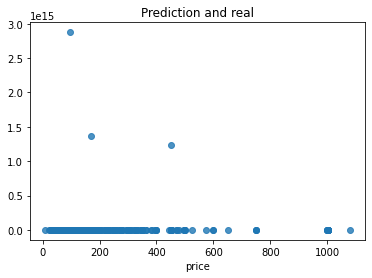

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


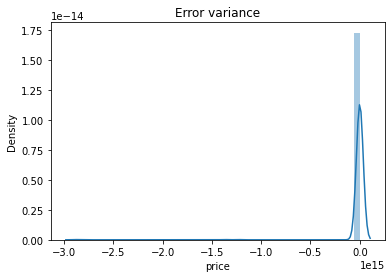

In [46]:
lm = LinearRegression(
        n_jobs = -1,
        normalize = True
)

lm.fit(X_train, y_train)


analysis(
    model = lm, 
    X_train = X_train, 
    X_test = X_test, 
    y_train = y_train, 
    y_test = y_test
)

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,42.29,5937.59,77.06,0.467,0.282,0.79,0.92


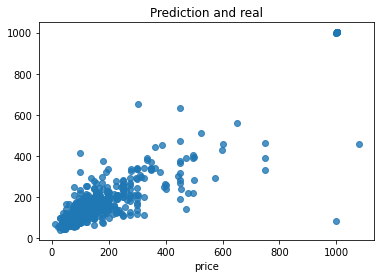

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


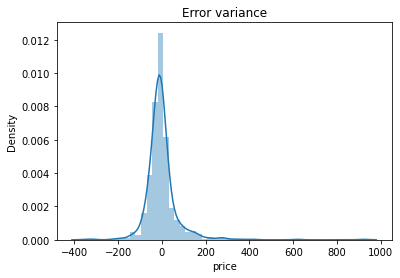

In [47]:
rfm = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)
rfm.fit(X_train, y_train)


analysis(
    model = rfm, 
    X_train = X_train, 
    X_test = X_test, 
    y_train = y_train, 
    y_test = y_test
)

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,45.25,6207.28,78.79,0.477,0.381,0.78,0.85


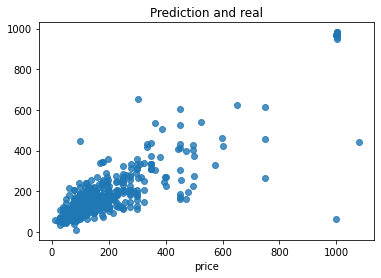

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


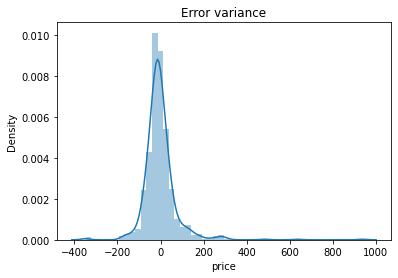

In [48]:
gbr_model = GradientBoostingRegressor(random_state = 101)
gbr_model.fit(X_train, y_train)

analysis(
    model = gbr_model, 
    X_train = X_train, 
    X_test = X_test, 
    y_train = y_train, 
    y_test = y_test
)

In [49]:
#scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train.values)
X_test_sc = scaler.transform(X_test.values)
y_train = y_train.values
y_test = y_test.values

Epoch 1/500
22/22 [==============================] - 1s 44ms/step - loss: 46229.0603 - val_loss: 53327.0977
Epoch 2/500
22/22 [==============================] - 0s 4ms/step - loss: 47128.1034 - val_loss: 51319.4844
Epoch 3/500
22/22 [==============================] - 0s 4ms/step - loss: 46641.4207 - val_loss: 49129.5195
Epoch 4/500
22/22 [==============================] - 0s 4ms/step - loss: 40935.1028 - val_loss: 46710.3125
Epoch 5/500
22/22 [==============================] - 0s 4ms/step - loss: 39292.9239 - val_loss: 44179.1445
Epoch 6/500
22/22 [==============================] - 0s 4ms/step - loss: 33336.2805 - val_loss: 41566.9727
Epoch 7/500
22/22 [==============================] - 0s 4ms/step - loss: 34777.6085 - val_loss: 39067.9258
Epoch 8/500
22/22 [==============================] - 0s 10ms/step - loss: 32438.5469 - val_loss: 36614.6680
Epoch 9/500
22/22 [==============================] - 0s 4ms/step - loss: 32807.7944 - val_loss: 34401.7500
Epoch 10/500
22/22 [===============

Epoch 77/500
22/22 [==============================] - 0s 4ms/step - loss: 16257.5404 - val_loss: 16075.0332
Epoch 78/500
22/22 [==============================] - 0s 4ms/step - loss: 14980.0782 - val_loss: 16008.0518
Epoch 79/500
22/22 [==============================] - 0s 4ms/step - loss: 12880.9893 - val_loss: 15927.6641
Epoch 80/500
22/22 [==============================] - 0s 4ms/step - loss: 13001.9907 - val_loss: 15865.6943
Epoch 81/500
22/22 [==============================] - 0s 4ms/step - loss: 15769.4631 - val_loss: 15783.7314
Epoch 82/500
22/22 [==============================] - 0s 4ms/step - loss: 13456.5649 - val_loss: 15757.9814
Epoch 83/500
22/22 [==============================] - 0s 4ms/step - loss: 14226.3635 - val_loss: 15636.4414
Epoch 84/500
22/22 [==============================] - 0s 4ms/step - loss: 11901.1381 - val_loss: 15571.2861
Epoch 85/500
22/22 [==============================] - 0s 4ms/step - loss: 13679.0033 - val_loss: 15501.9990
Epoch 86/500
22/22 [========

22/22 [==============================] - 0s 5ms/step - loss: 10265.6564 - val_loss: 12336.5840
Epoch 153/500
22/22 [==============================] - 0s 5ms/step - loss: 9515.5053 - val_loss: 12302.8740
Epoch 154/500
22/22 [==============================] - 0s 5ms/step - loss: 9132.3027 - val_loss: 12268.9023
Epoch 155/500
22/22 [==============================] - 0s 5ms/step - loss: 9891.4348 - val_loss: 12247.3682
Epoch 156/500
22/22 [==============================] - 0s 5ms/step - loss: 10484.0346 - val_loss: 12206.2607
Epoch 157/500
22/22 [==============================] - 0s 7ms/step - loss: 8975.4790 - val_loss: 12174.9521
Epoch 158/500
22/22 [==============================] - 0s 6ms/step - loss: 11346.0460 - val_loss: 12151.1943
Epoch 159/500
22/22 [==============================] - 0s 6ms/step - loss: 10109.6370 - val_loss: 12132.7578
Epoch 160/500
22/22 [==============================] - 0s 5ms/step - loss: 10782.6803 - val_loss: 12156.9043
Epoch 161/500
22/22 [================

Epoch 228/500
22/22 [==============================] - 0s 5ms/step - loss: 10044.7994 - val_loss: 10634.0254
Epoch 229/500
22/22 [==============================] - 0s 4ms/step - loss: 8054.6800 - val_loss: 10624.9209
Epoch 230/500
22/22 [==============================] - 0s 4ms/step - loss: 7603.6831 - val_loss: 10601.3936
Epoch 231/500
22/22 [==============================] - 0s 4ms/step - loss: 8755.7010 - val_loss: 10595.5957
Epoch 232/500
22/22 [==============================] - 0s 4ms/step - loss: 8760.0562 - val_loss: 10565.4590
Epoch 233/500
22/22 [==============================] - 0s 4ms/step - loss: 9576.6206 - val_loss: 10549.6045
Epoch 234/500
22/22 [==============================] - 0s 4ms/step - loss: 9165.9052 - val_loss: 10563.7451
Epoch 235/500
22/22 [==============================] - 0s 9ms/step - loss: 10737.7340 - val_loss: 10530.2285
Epoch 236/500
22/22 [==============================] - 0s 4ms/step - loss: 8246.6625 - val_loss: 10497.5596
Epoch 237/500
22/22 [=====

22/22 [==============================] - 0s 5ms/step - loss: 7676.1039 - val_loss: 9440.2275
Epoch 305/500
22/22 [==============================] - 0s 5ms/step - loss: 8378.2810 - val_loss: 9427.4600
Epoch 306/500
22/22 [==============================] - 0s 9ms/step - loss: 6956.4072 - val_loss: 9399.4697
Epoch 307/500
22/22 [==============================] - 0s 7ms/step - loss: 6711.9247 - val_loss: 9391.7500
Epoch 308/500
22/22 [==============================] - 0s 7ms/step - loss: 7433.4365 - val_loss: 9386.9619
Epoch 309/500
22/22 [==============================] - 0s 6ms/step - loss: 8513.3022 - val_loss: 9382.5156
Epoch 310/500
22/22 [==============================] - 0s 7ms/step - loss: 7928.9577 - val_loss: 9359.2275
Epoch 311/500
22/22 [==============================] - 0s 7ms/step - loss: 8200.2847 - val_loss: 9377.4258
Epoch 312/500
22/22 [==============================] - 0s 7ms/step - loss: 7047.4388 - val_loss: 9348.5625
Epoch 313/500
22/22 [==============================

22/22 [==============================] - 0s 4ms/step - loss: 5854.0573 - val_loss: 8403.6426
Epoch 381/500
22/22 [==============================] - 0s 5ms/step - loss: 6849.0604 - val_loss: 8401.9053
Epoch 382/500
22/22 [==============================] - 0s 4ms/step - loss: 5707.5114 - val_loss: 8408.0156
Epoch 383/500
22/22 [==============================] - 0s 5ms/step - loss: 6132.4503 - val_loss: 8395.6797
Epoch 384/500
22/22 [==============================] - 0s 4ms/step - loss: 6046.3846 - val_loss: 8374.1309
Epoch 385/500
22/22 [==============================] - 0s 4ms/step - loss: 6508.4003 - val_loss: 8372.4941
Epoch 386/500
22/22 [==============================] - 0s 4ms/step - loss: 7680.3637 - val_loss: 8360.8809
Epoch 387/500
22/22 [==============================] - 0s 4ms/step - loss: 7433.5555 - val_loss: 8356.5596
Epoch 388/500
22/22 [==============================] - 0s 4ms/step - loss: 6942.2058 - val_loss: 8331.1328
Epoch 389/500
22/22 [==============================

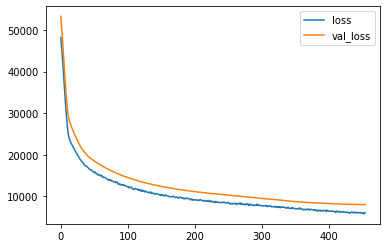

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,53.75,8010.81,89.5,0.542,0.476,0.72,0.77


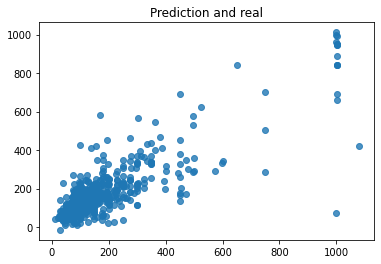

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


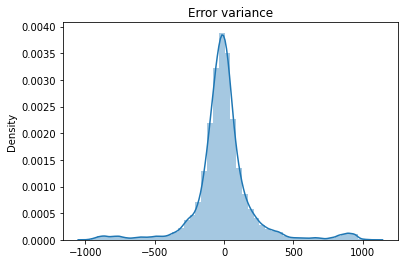

In [50]:
nn_model1 = Sequential()


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)


nn_model1.add(Dense(64, activation = 'relu'))
nn_model1.add(Dropout(0.1))
nn_model1.add(Dense(1))

nn_model1.compile(
    optimizer='rmsprop',
    loss='mse'
)

nn_model1.fit(
    x = X_train_sc,
    y = y_train,
    epochs = 500,
    validation_data=(X_test_sc, y_test), 
    batch_size = 128,
    callbacks=[es]
)


pd.DataFrame(nn_model1.history.history).plot()
plt.show()

analysis(model = nn_model1, 
         X_train = X_train_sc, 
         X_test = X_test_sc, 
         y_train = y_train, 
         y_test = y_test)

# Model Selection

### If we compare the models, R (correlation coefficient) square is max for train and test sets for RandomForestRegressor model, which means that this model fits best with the dependent variables. 

### Also, MAE (Mean Absolute Error) and RMSE (Root Mean Square Error) is the least for RandomForestRegressor model.

### Hence we can conclude the best model here is RandomForestRegressor.

In [51]:
# Predicting the price for the predict dataset

# Real test set prediction using RandomForestRegressor

In [52]:
df_to_predict.head()

,room_type_Shared room,room_type_Private room,room_type_Entire home/apt,property_type_other,property_type_Townhouse,property_type_Tiny house,property_type_Serviced apartment,property_type_Other,property_type_Loft,property_type_Houseboat,...,amenities_Babysitter recommendations,amenities_Baby monitor,amenities_Baby bath,amenities_BBQ grill,amenities_Amazon Echo,amenities_Air conditioning,amenities_Accessible-height toilet,amenities_Accessible-height bed,amenities_24-hour check-in,accommodates
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2


In [53]:
predicted_price = rfm.predict(df_to_predict)

In [54]:
predicted_price

array([133.40262717,  90.52309392, 133.58048529, ...,  63.57536055,
       123.1662705 , 207.56419994])

In [55]:
type(df_final_predicted)
df_final_predicted["price"] = predicted_price


In [56]:
df_final_predicted.head()

,id,price
0,392779,133.402627
1,12456183,90.523094
2,1851863,133.580485
3,23309878,136.561801
4,10768347,61.738948


In [57]:
df_final_predicted.describe()

,id,price
count,1.734000e+03,1734.000000
mean,1.807491e+07,154.054710
std,9.052766e+06,116.207018
min,2.318000e+03,25.878887
25%,1.125773e+07,97.012561
50%,2.005960e+07,127.473495
75%,2.519135e+07,177.082606
max,3.223937e+07,1002.000000


In [58]:
df_final_predicted.to_csv('ejam_predicted_price.csv')

In [59]:
df_final_predicted.to_excel('ejam_predicted_price.xlsx')